This is an analysis of proton collision data taken here : http://opendata.cern.ch/record/1000
CMS list of validated runs for primary datasets of 2010 data taking.

The goal is to predicting the number of jets. 

Each candidate is described by 15 continuous variables and 2 single class variable
1) Run: The run number of the event.

2) Lumi: The lumi section of the event.

3) Event: The event number of the event.

4) MR: First razor kinematic variable, the MR variable is an estimate of an overall mass scale, which in the limit of massless decay products equals the mass of the heavy parent particle.

5) Rsq: Second razor kinematic variable, the Rsq variable is the square of the ratio R, which quantifies the flow of energy in the plane perpendicular to the beam and the partitioning of momentum between visible and invisible particles.

6,7,8,9) E1,Px1,Py1,Pz1: The four-vector of the leading megajet (with the largest transverse momentum).

10,11,12,13) E2,Px2,Py2,Pz2: The four-vector of the subleading megajet (with the largest transverse momentum).

14) HT: The scalar sum of the transverse momentum of the jets.

15) MET: The magnitude of the vector sum of the transverse energy of the particles in the event.

16) nJets: The number of jets with transverse momentum above 40 GeV.

17) nBJets: The number of b-tagged jets with transverse momentum above 40 GeV.

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Import and arrange data

In [2]:
## import data
data = pd.read_csv("../projet_proton/MultiJetRun2010B.csv")#, nrows = 1000)
data.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


## Explore data

In [3]:
print(data.shape)
print(data.columns)
data.describe()

(21726, 17)
Index(['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2',
       'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets'],
      dtype='object')


,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


In [4]:
data.info

<bound method DataFrame.info of           Run  Lumi       Event       MR       Rsq        E1        Px1  \
0      148029   388   302318745  215.553  0.031977  136.7100 -109.89300   
1      148029   388   302323641  155.437  0.042157   83.3865   81.15000   
2      148029   388   302336217  400.563  0.026938  253.1840  139.90200   
3      148029   388   302382289  286.245  0.094192  175.4860 -156.02400   
4      148029   388   302403873  204.514  0.018804  833.7950  100.41000   
...       ...   ...         ...      ...       ...       ...        ...   
21721  149181  1804  1703614264  540.609  0.019221  333.8870   43.55990   
21722  149181  1804  1703630424  336.015  0.028433  190.1890   -7.40921   
21723  149181  1804  1703621104  484.392  0.000920  197.1530  -61.55070   
21724  149181  1804  1703642752  215.713  0.055836  647.4060  -78.95460   
21725  149181  1804  1703634776  547.384  0.001232  242.4140  191.21800   

             Py1       Pz1        E2        Px2        Py2       Pz

In [5]:
## null data
data.isnull().sum()

Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64

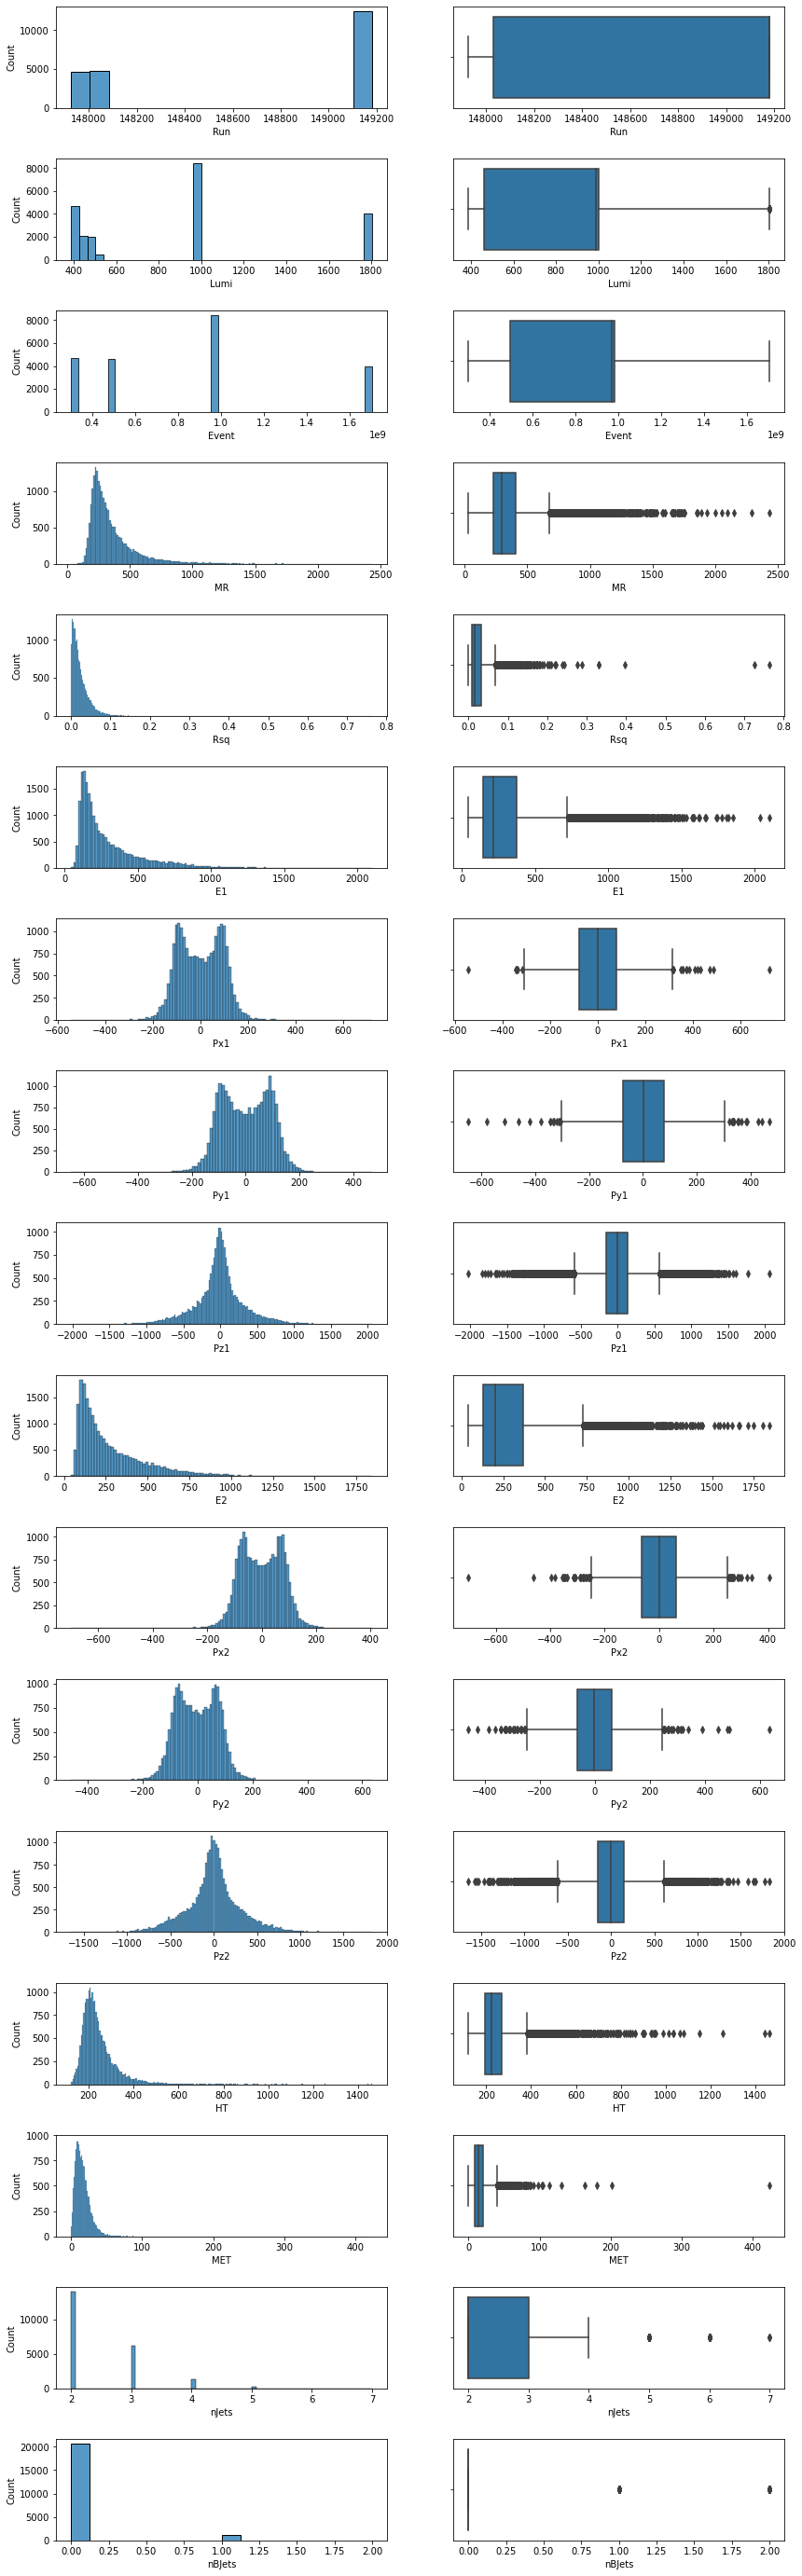

In [6]:
# plots
fig, axes = plt.subplots(nrows=17,ncols=2,  figsize=(14, 50))
fig.subplots_adjust(hspace = .5, wspace=.2)
for i in range(0,len(data.columns)):
    sns.histplot(x=data[data.columns[i]], ax=axes[i][0])
    sns.boxplot(x=data[data.columns[i]], ax=axes[i][1])

In [7]:
# duplicates : 
print(data.dtypes, "\n")
for i in range(0,len(data.columns)):
    print(data.columns[i])
    print(data[data.columns[i]].value_counts())

Run         int64
Lumi        int64
Event       int64
MR        float64
Rsq       float64
E1        float64
Px1       float64
Py1       float64
Pz1       float64
E2        float64
Px2       float64
Py2       float64
Pz2       float64
HT        float64
MET       float64
nJets       int64
nBJets      int64
dtype: object 

Run
149181    12424
148029     4706
147926     4102
147929      494
Name: Run, dtype: int64
Lumi
1000    1137
986     1104
999     1067
997     1061
998     1028
985     1027
992     1002
991      998
1788     819
1789     816
1802     813
1804     792
1803     760
462      718
464      696
465      694
467      671
466      665
463      658
390      619
388      618
393      603
395      593
394      580
389      576
391      573
392      544
532      494
Name: Lumi, dtype: int64
Event
302318745     1
983526049     1
983549481     1
983560473     1
983571433     1
             ..
500947748     1
500940892     1
500939508     1
500934220     1
1703634776    1
Name: Even

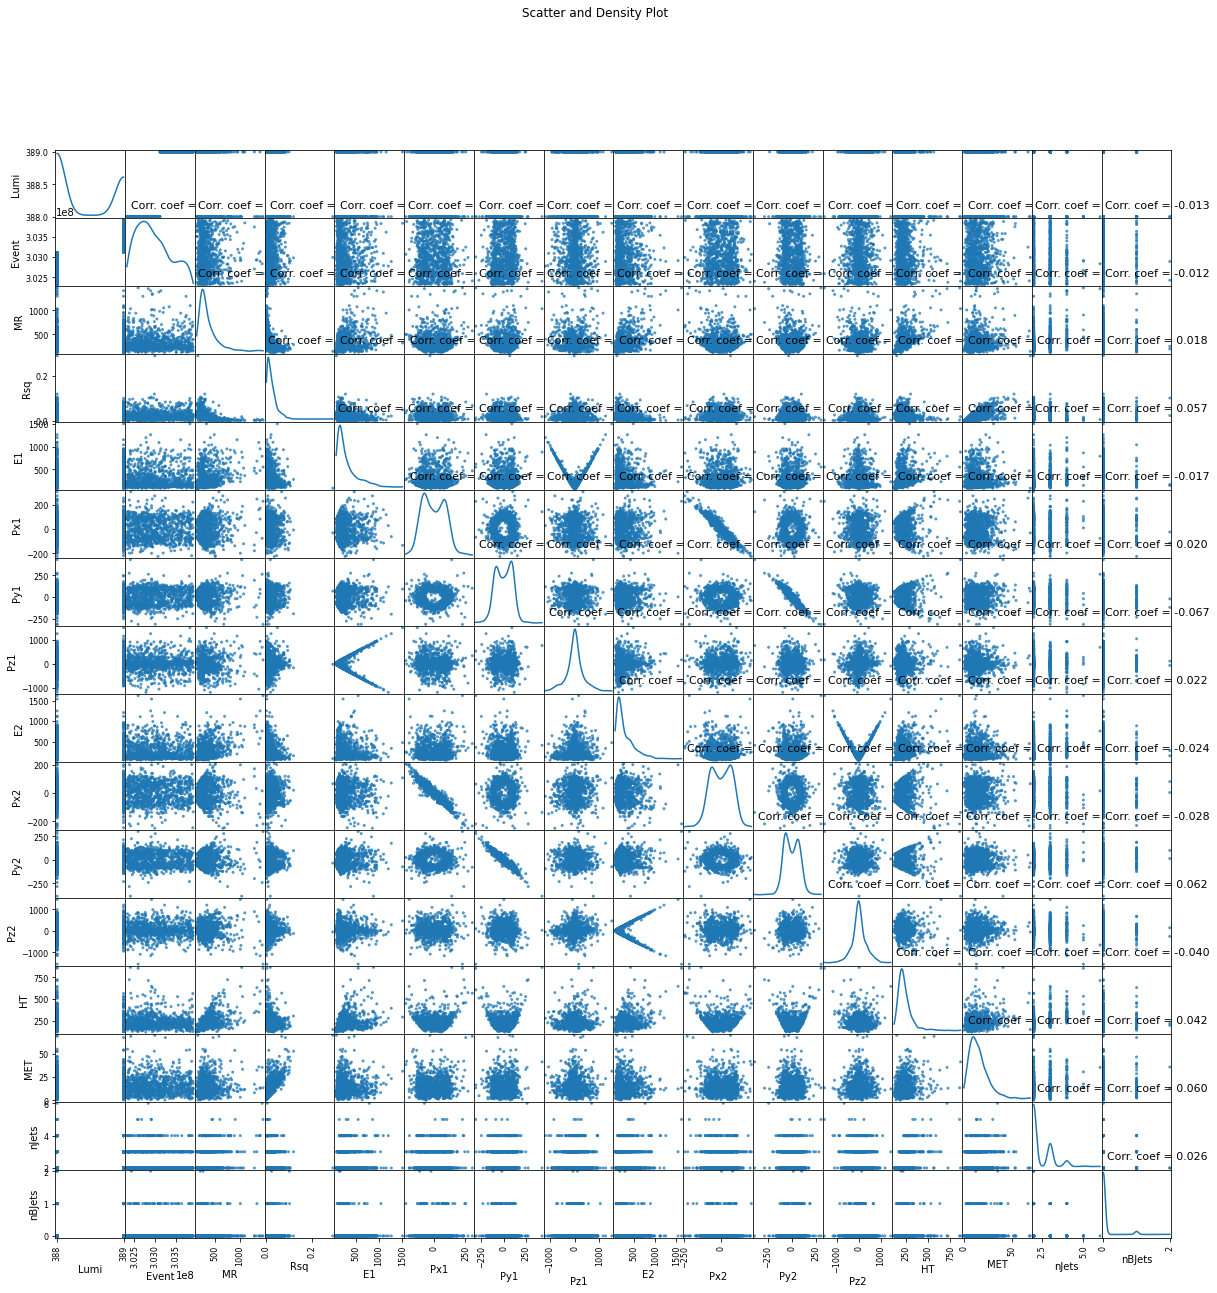

In [8]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
#    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
#        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


plotScatterMatrix(data[:1000], 20, 11) #plot only first 1000 rown

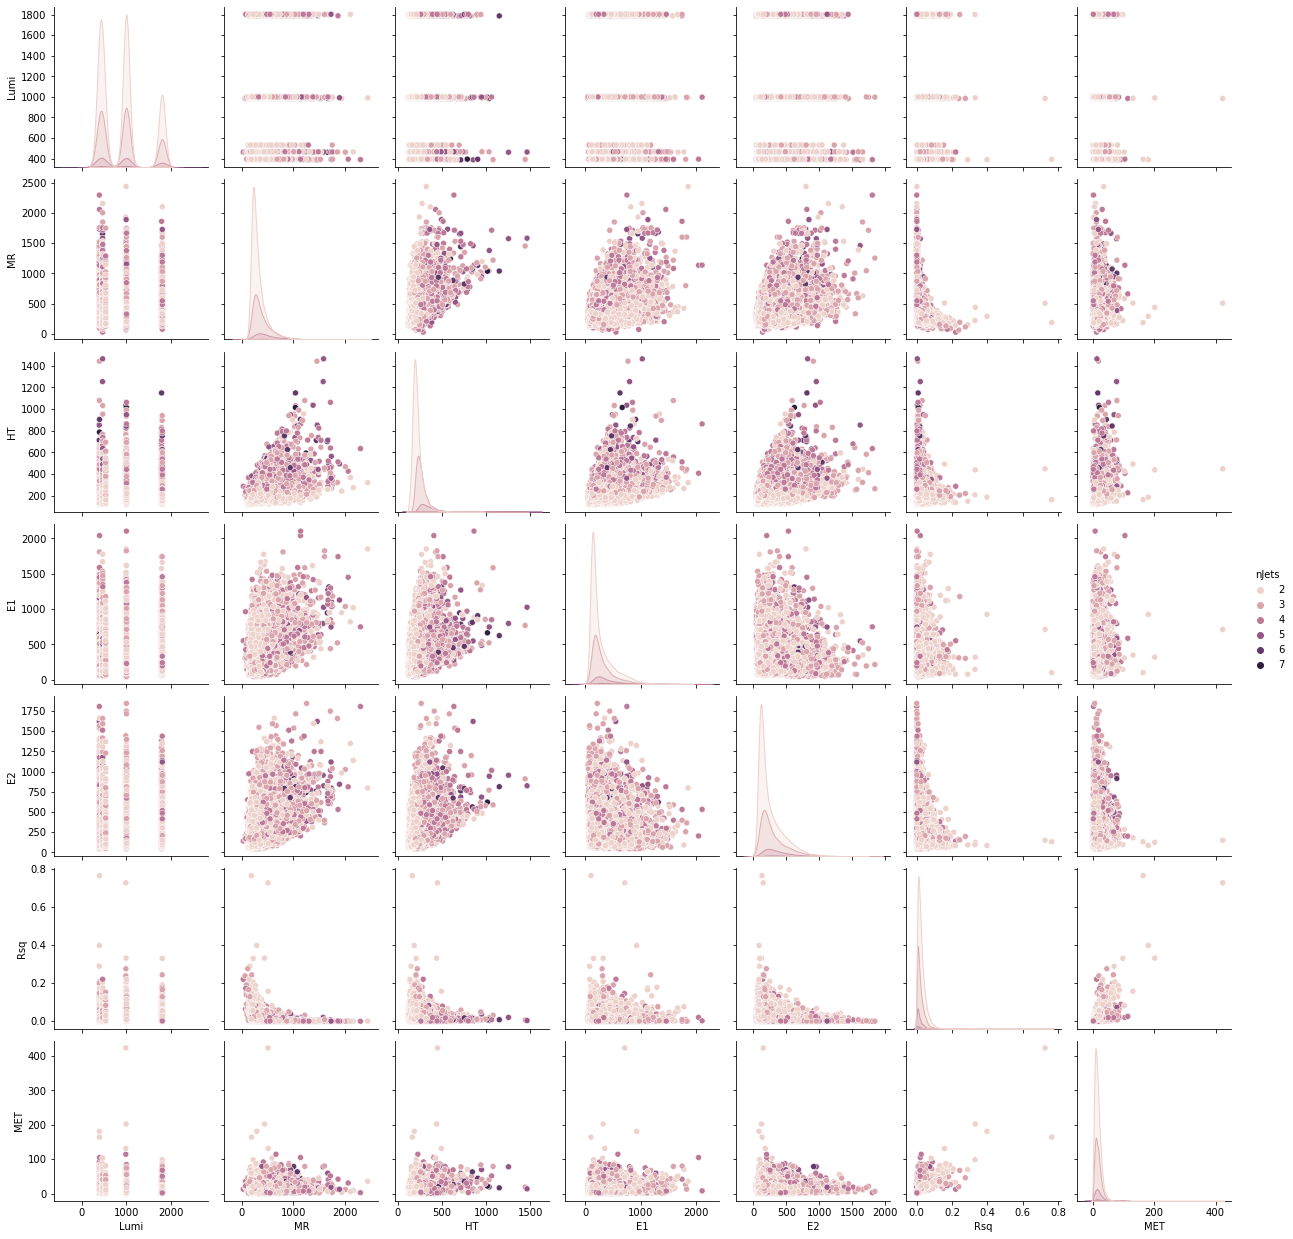

In [9]:
#seaborn to plot between any two columns, nJet is the target is highlighted
sns.pairplot(
    data,hue="nJets",
    x_vars=["Lumi", "MR", "HT", "E1","E2","Rsq","MET"],
    y_vars=["Lumi", "MR", "HT", "E1","E2","Rsq","MET",],
)

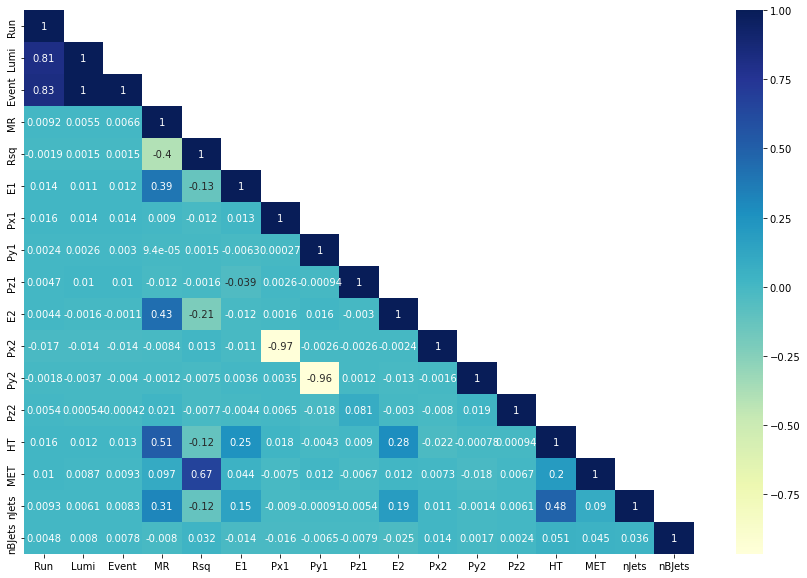

In [10]:
#Correlation matrix,
#sns.set_style()
plt.figure(figsize=(15,10))
correlMap = data.corr()
sns.heatmap(correlMap, xticklabels=correlMap.columns, yticklabels=correlMap.columns, annot=True, mask=np.triu(data.corr(),+1), cmap="YlGnBu")
plt.show()

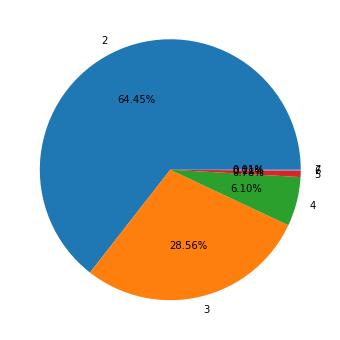

<AxesSubplot:xlabel='nJets', ylabel='count'>

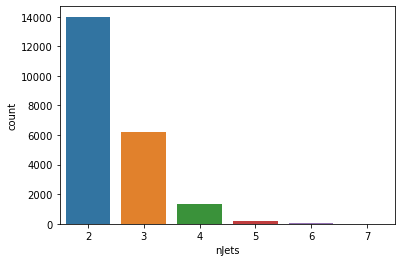

In [11]:
# Check results distribution 

plt.figure(figsize=(6,6))
plt.pie(x=data.nJets.value_counts(normalize=True),autopct='%.2f%%', labels=data.groupby('nJets').nJets.min())
plt.show()

sns.countplot(x=data.nJets)

#data.nJets.values
#data.groupby('nJets').nJets.min()

## Arrange Data

In [12]:
#null data
data.isnull().sum()


Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64

Number of Outliers :
Run          0
Lumi         0
Event        0
MR         172
Rsq        104
E1          54
Px1          4
Py1          5
Pz1         11
E2          37
Px2          5
Py2          8
Pz2          8
HT         130
MET         58
nJets      195
nBJets    1111
dtype: int64


(-2500.0, 2500.0)

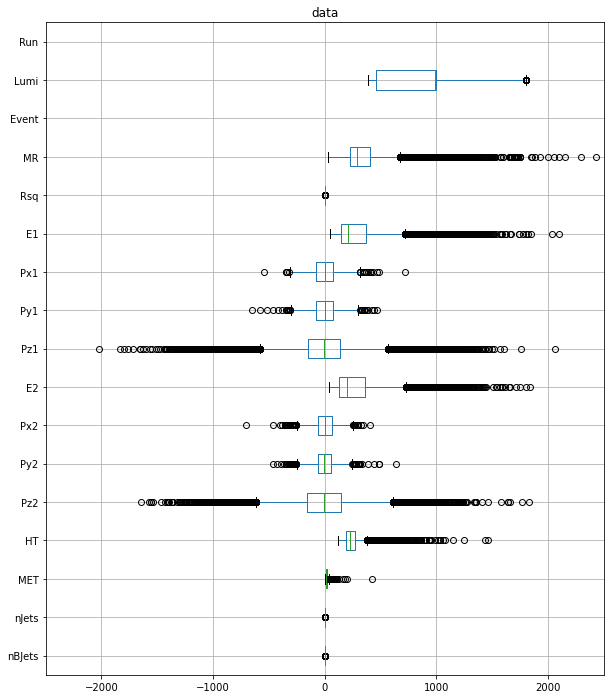

In [13]:
# Outliers 
# Outliers 
Q1 = data.quantile(0.1)
Q3 = data.quantile(0.9)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers :')
print(((data < (lower_range)) | (data > (upper_range))).sum())

#print(list(imputed_train_data.columns))
coll = list(data.columns)
coll.reverse()
plt.figure(figsize=(10,12))
plt.title('data')
data.boxplot(vert=0, column=coll)
plt.xlim(-2500, 2500)

(-2500.0, 2500.0)

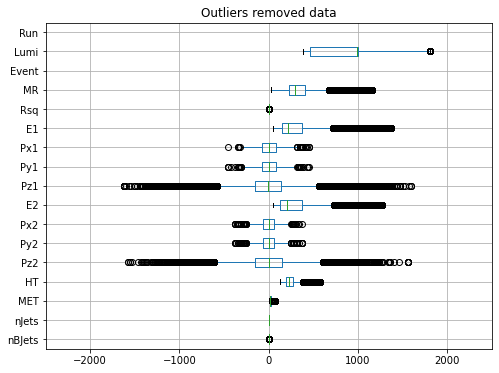

In [14]:
# In physics I am not used to just remove data, so I will cap them using an Interquartile Range (IQR)

data_outl = data.copy()
for colu in data_outl.columns[:-1]:    
    data_outl[colu] = np.where(data_outl[colu]>upper_range[colu],
                                             upper_range[colu],data_outl[colu])
    data_outl[colu] = np.where(data_outl[colu]<lower_range[colu],
                                             lower_range[colu],data_outl[colu])

plt.figure(figsize=(8,6))
plt.title('Outliers removed data')
data_outl.boxplot(vert=0, column=coll)
plt.xlim(-2500, 2500)


<AxesSubplot:>

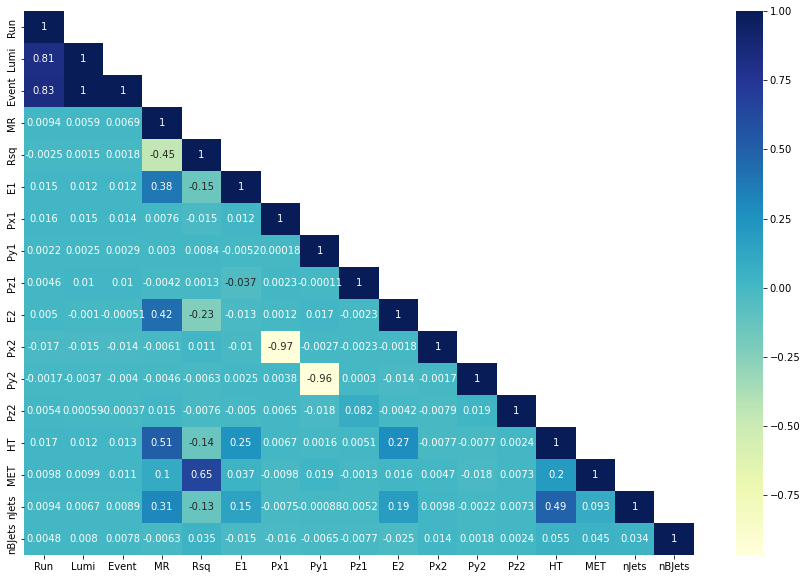

In [15]:
# Correlation plot after outlier treatment
plt.figure(figsize = (15, 10))
correlMapFin = data_outl.corr()
sns.heatmap(correlMapFin, xticklabels=correlMapFin.columns, yticklabels=correlMapFin.columns, annot=True, mask=np.triu(data_outl.corr(),+1), cmap="YlGnBu")


## Models 

In [16]:
# Split data
from sklearn.model_selection import train_test_split

X = data.drop(['Run','nJets','Event','Lumi','nBJets','Pz2','MET','Pz1'], axis=1)
y = data.nJets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#X_train.head()

#### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

modelRFC = RandomForestClassifier()
modelRFC.fit(X_train,y_train)
predRFC = modelRFC.predict(X_test)

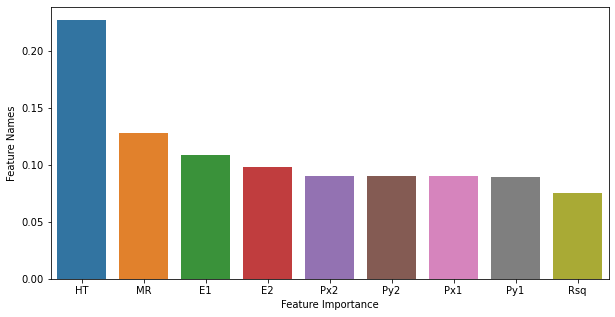

In [19]:
feature_importance = np.array(modelRFC.feature_importances_)
feature_names = np.array(X_train.columns)
Data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(Data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(y=df_plt['feature_importance'], x=df_plt['feature_names'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

In [20]:
scoreRFC = accuracy_score(y_test,predRFC)
print(scoreRFC)

0.7809479981592269


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score : ", accuracy_score(y_test, predRFC))
print("Confusion matrix \n", confusion_matrix(y_test, predRFC))
print("Classification report \n ", classification_report(y_test, predRFC, zero_division=0))
print("Classification report \n ", classification_report(y_test, predRFC, zero_division=1))

Accuracy score :  0.7809479981592269
Confusion matrix 
 [[2609  176    6    0    0]
 [ 486  745   30    0    0]
 [  36  179   40    3    0]
 [   3   21    9    0    0]
 [   0    1    2    0    0]]
Classification report 
                precision    recall  f1-score   support

           2       0.83      0.93      0.88      2791
           3       0.66      0.59      0.63      1261
           4       0.46      0.16      0.23       258
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00         3

    accuracy                           0.78      4346
   macro avg       0.39      0.34      0.35      4346
weighted avg       0.75      0.78      0.76      4346

Classification report 
                precision    recall  f1-score   support

           2       0.83      0.93      0.88      2791
           3       0.66      0.59      0.63      1261
           4       0.46      0.16      0.23       258
           5       0.00      0.00      0.00    

#### K Neighbours Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=4)
modelknn.fit(X_train,y_train)
predknn = modelknn.predict(X_test)
probsknn = modelknn.predict_proba(X_test)
modelknn.score(X_test,y_test)

0.6912103083294984

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score : ", accuracy_score(y_test, predknn))
print("Confusion matrix \n", confusion_matrix(y_test, predknn))
print("Classification report \n ", classification_report(y_test, predknn, zero_division=0))
print("Classification report \n ", classification_report(y_test, predknn, zero_division=1))

Accuracy score :  0.6912103083294984
Confusion matrix 
 [[2581  193   15    2    0]
 [ 833  383   41    4    0]
 [  93  125   39    1    0]
 [   9   16    7    1    0]
 [   1    1    1    0    0]]
Classification report 
                precision    recall  f1-score   support

           2       0.73      0.92      0.82      2791
           3       0.53      0.30      0.39      1261
           4       0.38      0.15      0.22       258
           5       0.12      0.03      0.05        33
           6       0.00      0.00      0.00         3

    accuracy                           0.69      4346
   macro avg       0.35      0.28      0.29      4346
weighted avg       0.65      0.69      0.65      4346

Classification report 
                precision    recall  f1-score   support

           2       0.73      0.92      0.82      2791
           3       0.53      0.30      0.39      1261
           4       0.38      0.15      0.22       258
           5       0.12      0.03      0.05    

In [24]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(X_train,y_train)
predknn = modelknn.predict(X_test)
probsknn = modelknn.predict_proba(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score : ", accuracy_score(y_test, predknn))
print("Confusion matrix \n", confusion_matrix(y_test, predknn))
print("Classification report \n ", classification_report(y_test, predknn, zero_division=0))
print("Classification report \n ", classification_report(y_test, predknn, zero_division=1))

Accuracy score :  0.6921306948918545
Confusion matrix 
 [[2504  279    8    0    0]
 [ 756  474   29    2    0]
 [  89  139   29    1    0]
 [   8   17    7    1    0]
 [   1    1    1    0    0]]
Classification report 
                precision    recall  f1-score   support

           2       0.75      0.90      0.81      2791
           3       0.52      0.38      0.44      1261
           4       0.39      0.11      0.17       258
           5       0.25      0.03      0.05        33
           6       0.00      0.00      0.00         3

    accuracy                           0.69      4346
   macro avg       0.38      0.28      0.30      4346
weighted avg       0.66      0.69      0.66      4346

Classification report 
                precision    recall  f1-score   support

           2       0.75      0.90      0.81      2791
           3       0.52      0.38      0.44      1261
           4       0.39      0.11      0.17       258
           5       0.25      0.03      0.05    

### XGBoost regressor


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=1)
modelgb.fit(X_train,y_train)
predgb = modelgb.predict(X_test)
probsgb = modelgb.predict_proba(X_test)
modelgb.score(X_test,y_test)

0.6274735388863323

In [27]:
# AUC (Area Under Curve) as the evaluation metric. It's a binary classification problem. 
# AUC is a good way for evaluation for this type of problems...

from sklearn.metrics import roc_curve, auc, plot_roc_curve
y_score = modelgb.fit(X_train, y_train).decision_function(X_test)
print(y_score.shape)


(4346, 6)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

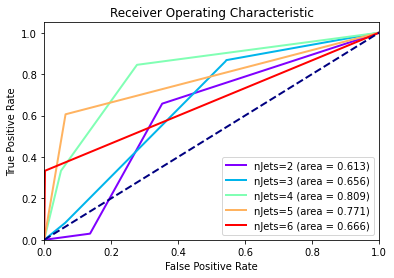

In [52]:
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])
## take the second column y_score[:,1] because the classifier outputs scores for the 0 class as well

#roc_auc = auc(false_positive_rate, true_positive_rate)
#print(roc_auc)



# Binarize the output
from sklearn.preprocessing import label_binarize
nJetsOut=[2, 3, 4, 5, 6]
y_test_bina = label_binarize(y_test, classes=nJetsOut)
n_classes = y_test_bina.shape[1]
##print(y_test_bina.shape)
##print(y_score.shape)

#rfc_disp = plot_roc_curve(modelgb, X_test, y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bina[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
from matplotlib.pyplot import cm

plt.figure()
lw = 2
colors = iter(cm.rainbow(np.linspace(0, 1, n_classes)))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        color=next(colors),
        lw=lw,
        label= "nJets=%1.0f (area = %0.3f)" %(nJetsOut[i] ,roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_bina[:,1], y_score[:,1])
#auc_score = auc(false_positive_rate, true_positive_rate)

#plt.title('ROC CurveS')
#plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.2f}'.format(auc_score))
#plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.2f}'.format(roc_auc[i]))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.1])
#plt.ylim([-0.1,1.1])
#plt.xlabel('False Positive Rate')
#plt.legend(loc='lower right')
#plt.show()
